# Analyzing Time Series for Chocolate Bar Ratings

## Index
### 0.1 Import Libraries
### 0.2 Import Data
### 0.3 Time Series

## 0.1 Import Libraries

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight') 

## 0.2 Import Data

In [2]:
# Create shortcut to folder path
path = r'C:\Users\chris\OneDrive\Documents\2-7-2024 Final Project'

In [3]:
# Upload file as new data frame
df_cacao = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','chocolate_bar_ratings_clean_updated.csv'), index_col = 0)

In [4]:
# Show new data frame
df_cacao.head()

company company_location  review_date country_of_bean_origin  \
0    5150           U.S.A.         2019               Tanzania   
1    5150           U.S.A.         2019             Madagascar   
2    5150           U.S.A.         2019     Dominican Republic   
3    5150           U.S.A.         2021                   Fiji   
4    5150           U.S.A.         2021                  India   

  specific_bean_or_bar_origin  cocoa_percent ingredients  \
0       Kokoa Kamili, batch 1           0.76    3- B,S,C   
1      Bejofo Estate, batch 1           0.76    3- B,S,C   
2             Zorzal, batch 1           0.76    3- B,S,C   
3       Matasawalevu, batch 1           0.68    3- B,S,C   
4           Anamalai, batch 1           0.68    3- B,S,C   

  most_memorable_characteristics  rating     Rating Category  \
0      rich cocoa, fatty, bready    3.25         Recommended   
1   cocoa, blackberry, full body    3.75  Highly Recommended   
2         cocoa, vegetal, savory    3.50  Highly Recommended   
3            chewy, off, rubbery    3.00         Recommended   
4  milk brownie, macadamia,chewy    3.50  Highly Recommended   

  cocoa_percent_classification  
0         Bittersweet and Dark  
1         Bittersweet and Dark  
2         Bittersweet and Dark  
3                   Semi-sweet  
4                   Semi-sweet

In [5]:
# Check shape of data frame
df_cacao.shape

(2588, 11)

In [6]:
# rename column
df_cacao = df_cacao.rename(columns = {'Review Date':'review_date','Rating':'rating'})

## 0.3 Preparing Data for Time Series

In [7]:
# Extract the year from the 'review_date' column as a string
df_cacao['review'] = pd.to_datetime(df_cacao['review_date'], format='%Y')


In [8]:
# Calculate the mean rating for each year
yearly_mean_rating = df_cacao.groupby('review_date')['rating'].mean()

In [9]:
# Map the mean ratings back to the data frame
df_cacao['yearly_mean_rating'] = df_cacao['review_date'].map(yearly_mean_rating)


In [10]:
# Display the updated data frame
df_cacao.head()

company company_location  review_date country_of_bean_origin  \
0    5150           U.S.A.         2019               Tanzania   
1    5150           U.S.A.         2019             Madagascar   
2    5150           U.S.A.         2019     Dominican Republic   
3    5150           U.S.A.         2021                   Fiji   
4    5150           U.S.A.         2021                  India   

  specific_bean_or_bar_origin  cocoa_percent ingredients  \
0       Kokoa Kamili, batch 1           0.76    3- B,S,C   
1      Bejofo Estate, batch 1           0.76    3- B,S,C   
2             Zorzal, batch 1           0.76    3- B,S,C   
3       Matasawalevu, batch 1           0.68    3- B,S,C   
4           Anamalai, batch 1           0.68    3- B,S,C   

  most_memorable_characteristics  rating     Rating Category  \
0      rich cocoa, fatty, bready    3.25         Recommended   
1   cocoa, blackberry, full body    3.75  Highly Recommended   
2         cocoa, vegetal, savory    3.50  Highly Recommended   
3            chewy, off, rubbery    3.00         Recommended   
4  milk brownie, macadamia,chewy    3.50  Highly Recommended   

  cocoa_percent_classification     review  yearly_mean_rating  
0         Bittersweet and Dark 2019-01-01            3.134715  
1         Bittersweet and Dark 2019-01-01            3.134715  
2         Bittersweet and Dark 2019-01-01            3.134715  
3                   Semi-sweet 2021-01-01            3.320000  
4                   Semi-sweet 2021-01-01            3.320000

In [11]:
# create subset data frame for time series analysis
df_time = df_cacao[['review_date','yearly_mean_rating']]

In [12]:
# Set the datetime as the index of the dataframe
from datetime import datetime
df_time = df_time.set_index('review_date').sort_index() 

In [13]:
# Eliminate duplicate values 
df_time = df_time.drop_duplicates()

In [14]:
# Check new data frame
df_time.head()

yearly_mean_rating
review_date                    
2006                   3.004032
2007                   3.102740
2008                   3.000000
2009                   3.073171
2010                   3.152273

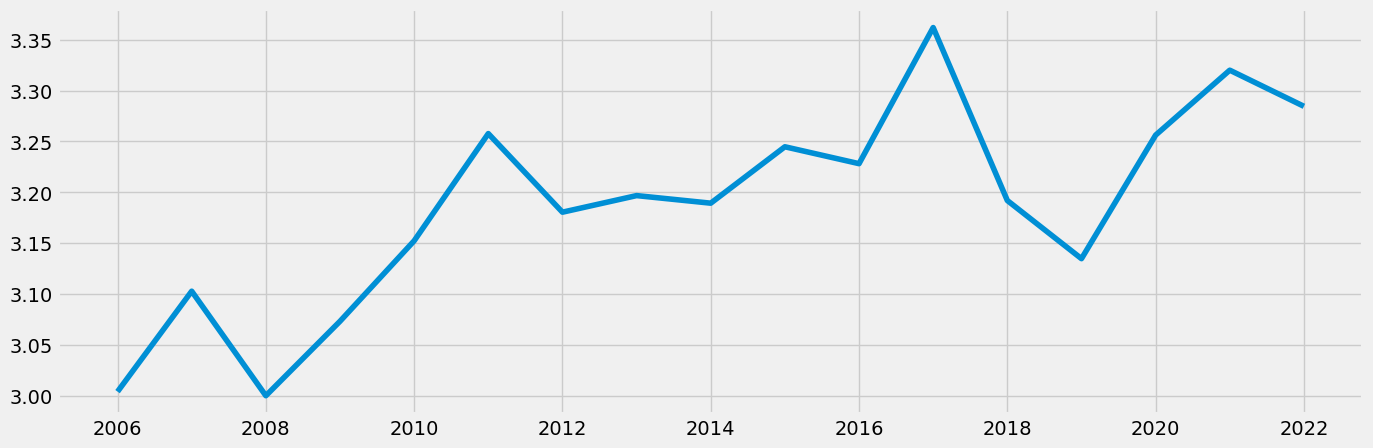

In [15]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_time)

In [23]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_time, model='additive', period=1)

In [24]:
from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

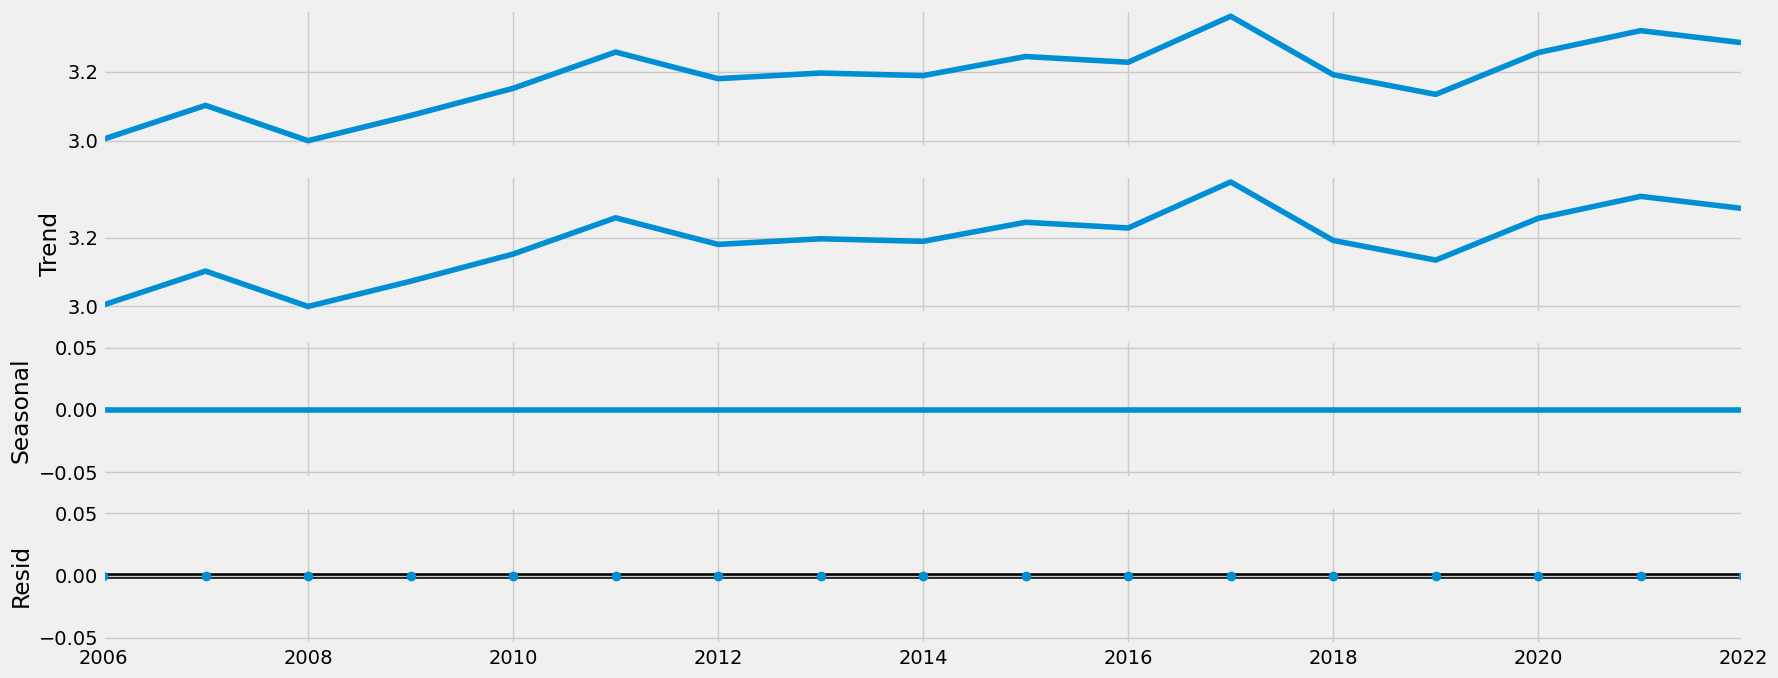

In [25]:
# Plot the separate components

decomposition.plot()
plt.show()

In [28]:
# Import the adfuller() function
from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_time['yearly_mean_rating'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.866949
p-value                         0.049329
Number of Lags Used             5.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64
